In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

### Wczytanie danych giełdowych

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Studia/SCGiE/data.csv')

In [ ]:
df

,7186.7,0.03272,0.2168,0.001442,0.01028,4.227,0.2225,0.1808,204.39,0.5355,...,0.1719,1.0071,9.22e-05,0.04488,44.65,0.19279,1.3514,27.49,0.00447,0.1809
0,7184.0,0.03278,0.2168,0.001442,0.01026,4.227,0.2225,0.1808,204.40,0.5355,...,0.1719,1.0097,0.000092,0.04488,44.65,0.19276,1.3482,27.50,0.00447,0.1809
1,7182.4,0.03273,0.2164,0.001441,0.01027,4.217,0.2211,0.1808,204.24,0.5355,...,0.1719,1.0073,0.000092,0.04485,44.60,0.19270,1.3445,27.48,0.00447,0.1809
2,7185.9,0.03273,0.2164,0.001441,0.01026,4.228,0.2211,0.1808,204.17,0.5355,...,0.1719,1.0073,0.000092,0.04485,44.66,0.19274,1.3463,27.47,0.00447,0.1809
3,7179.8,0.03273,0.2164,0.001441,0.01026,4.228,0.2210,0.1805,203.85,0.5355,...,0.1714,1.0073,0.000092,0.04486,44.64,0.19268,1.3444,27.50,0.00447,0.1809
4,7180.0,0.03276,0.2164,0.001442,0.01026,4.228,0.2210,0.1805,203.75,0.5355,...,0.1714,1.0073,0.000092,0.04486,44.64,0.19266,1.3454,27.48,0.00447,0.1809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912387,43811.0,2.11300,1.6179,0.079990,0.06948,35.760,7.2880,0.6291,505.70,0.5507,...,0.7758,24.2600,0.000406,0.27750,246.10,0.95720,6.6500,107.70,0.08587,0.8960
912388,43830.0,2.11400,1.6191,0.080060,0.06945,35.790,7.2860,0.6292,505.70,0.5532,...,0.7755,24.2700,0.000406,0.27740,246.10,0.95790,6.6460,107.60,0.08611,0.8957
912389,43840.0,2.11400,1.6200,0.080090,0.06949,35.780,7.2820,0.6293,505.70,0.5512,...,0.7756,24.2900,0.000406,0.27750,246.00,0.95820,6.6200,107.70,0.08613,0.8957
912390,43841.0,2.11300,1.6200,0.080100,0.06946,35.820,7.2730,0.6292,505.80,0.5531,...,0.7767,24.2900,0.000406,0.27760,246.00,0.95820,6.6320,107.70,0.08614,0.8957


### Policzenie logarytmicznych stóp zwrotu

In [ ]:
log_return_rates = np.log10(df / df.shift(1))
log_return_rates_norm = (log_return_rates - log_return_rates.mean()) / log_return_rates.std()

### Wyznaczenie macierzy korelacji

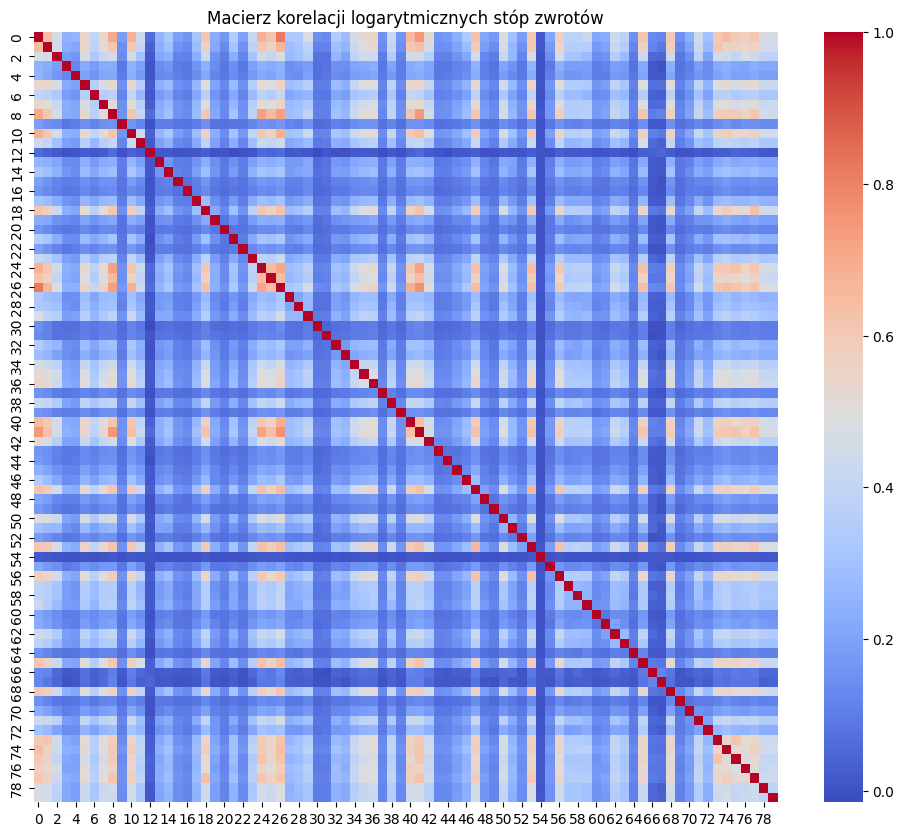

In [ ]:
correlation_matrix = log_return_rates_norm.corr()

correlation_matrix.index = range(len(correlation_matrix))
correlation_matrix.columns = range(len(correlation_matrix.columns))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji logarytmicznych stóp zwrotów')
plt.show()

### Wykreślenie histogramu wartości korelacji

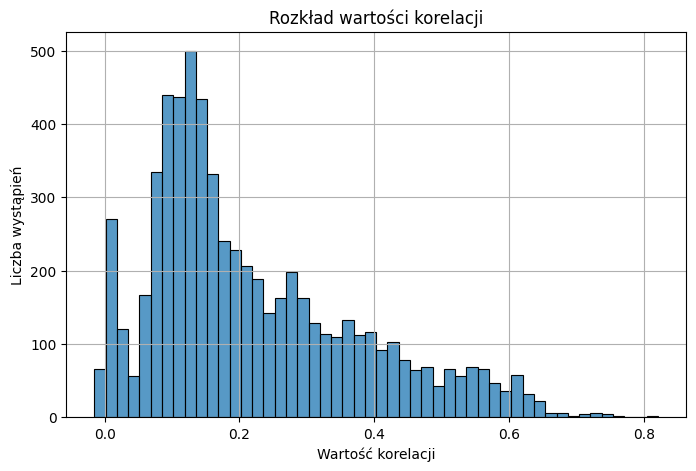

In [ ]:
# Bez wartości na przekątnej
corr_values = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).stack().values

plt.figure(figsize=(8, 5))
sns.histplot(corr_values, bins=50)
plt.title('Rozkład wartości korelacji')
plt.xlabel('Wartość korelacji')
plt.ylabel('Liczba wystąpień')
plt.grid(True)
plt.show()

### Obliczenie dystansów

In [ ]:
distances = np.sqrt(2 * (1 - correlation_matrix))

### Wyznaczenie drzewa MST

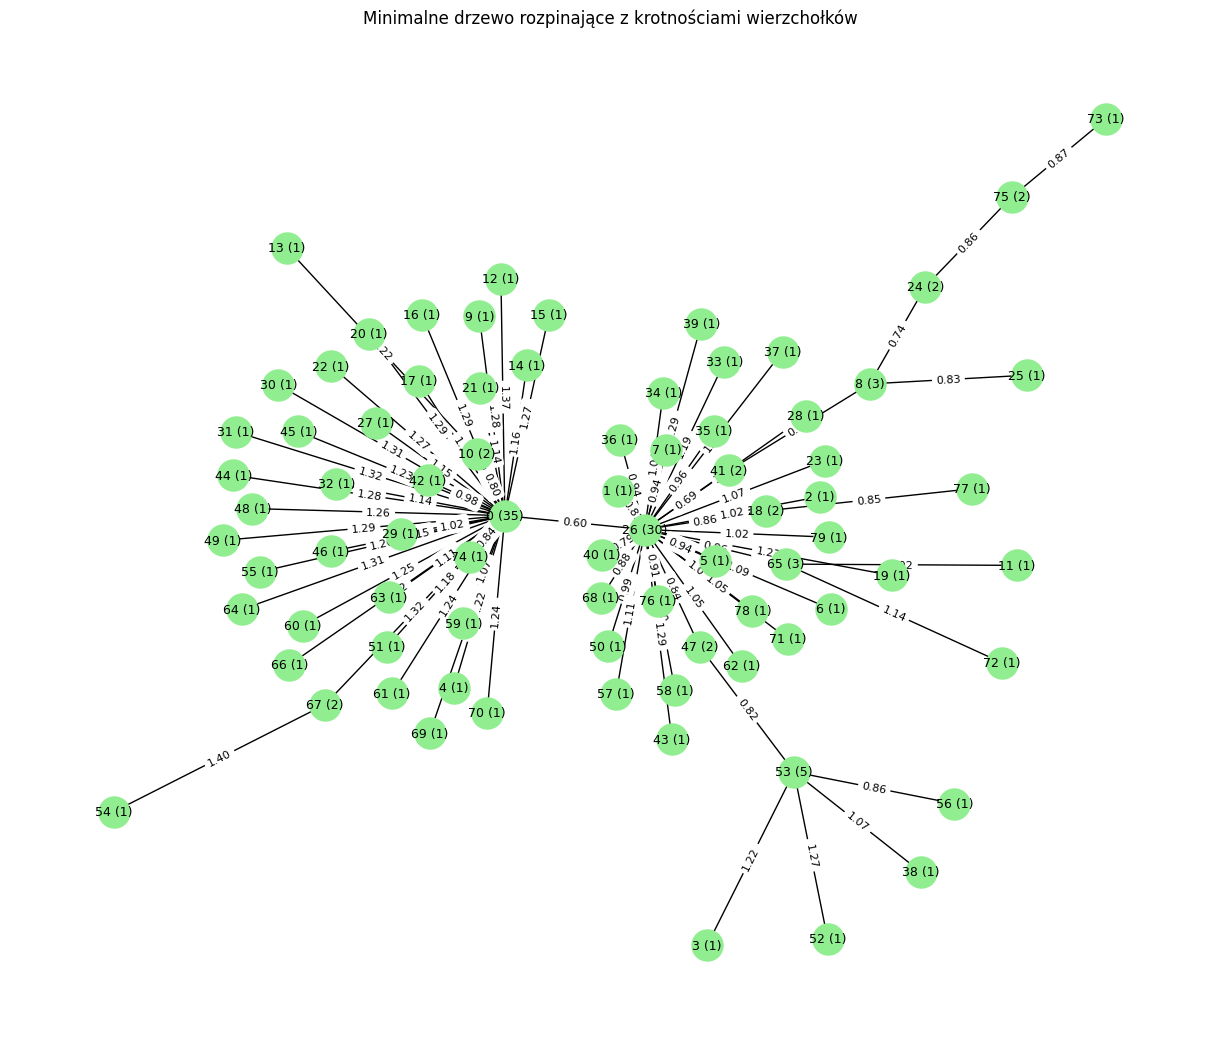

In [ ]:
# Tworzenie grafu
G = nx.Graph()
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        G.add_edge(distances.index[i], distances.columns[j], weight=distances.iloc[i, j])

# Minimalne drzewo rozpinające
mst = nx.minimum_spanning_tree(G, weight='weight')

# Pozycje węzłów do narysowania
pos = nx.kamada_kawai_layout(mst, weight='weight')

# Krotności wierzchołków
degrees = dict(mst.degree())

# Rysowanie
labels_with_degree = {node: f"{node} ({deg})" for node, deg in degrees.items()}
plt.figure(figsize=(12, 10))
nx.draw(mst, pos, labels=labels_with_degree,
        node_color='lightgreen', edge_color='black',
        node_size=500, font_size=9)

edge_labels = nx.get_edge_attributes(mst, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_size=8)

plt.title("Minimalne drzewo rozpinające z krotnościami wierzchołków")
plt.axis('off')
plt.show()

### Histogram krotności wierzchołków

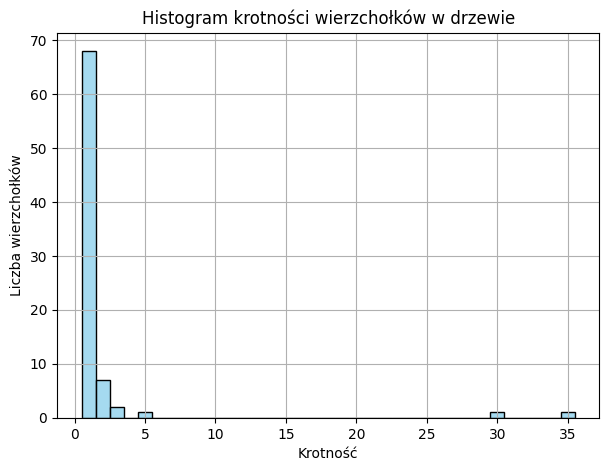

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(list(degrees.values()), bins=range(1, max(degrees.values())+2), discrete=True, color='skyblue')
plt.title("Histogram krotności wierzchołków w drzewie")
plt.xlabel("Krotność")
plt.ylabel("Liczba wierzchołków")
plt.grid(True)
plt.show()
